In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report
import pydotplus
from IPython.display import Image

In [54]:
data = pd.read_csv('drugs.csv')
data.head

<bound method NDFrame.head of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [13]:
# Convertir variables categóricas a numéricas con LabelEncoder
data_encoded = data.copy()
label_encoders = {}
for column in ['Sex', 'BP', 'Cholesterol','Drug']:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data_encoded[column])
    label_encoders[column] = le

data_encoded

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [17]:
# Separar las variables predictoras y la variable objetivo
X = data_encoded.drop('Drug', axis=1)
y = data_encoded['Drug']

#entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
# Entrenar el mejor modelo gini profundidar de 2
clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         6
           3       0.75      1.00      0.86        18
           4       1.00      1.00      1.00        26

    accuracy                           0.85        60
   macro avg       0.49      0.60      0.54        60
weighted avg       0.74      0.85      0.79        60



C:\Users\lalo1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lalo1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lalo1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


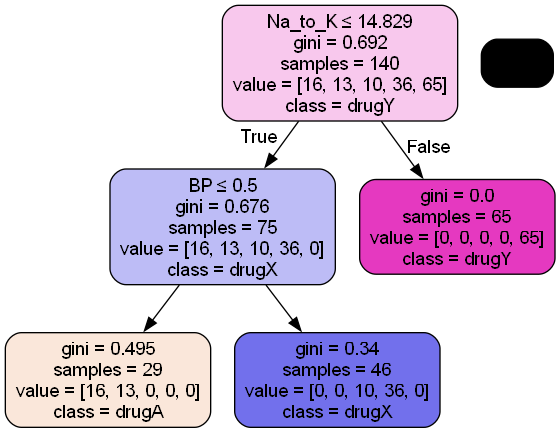

In [29]:
# Visualización del árbol de decisiones
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=label_encoders['Drug'].classes_,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

C:\Users\lalo1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lalo1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lalo1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         6
           3       0.75      1.00      0.86        18
           4       1.00      1.00      1.00        26

    accuracy                           0.90        60
   macro avg       0.75      0.80      0.77        60
weighted avg       0.82      0.90      0.86        60



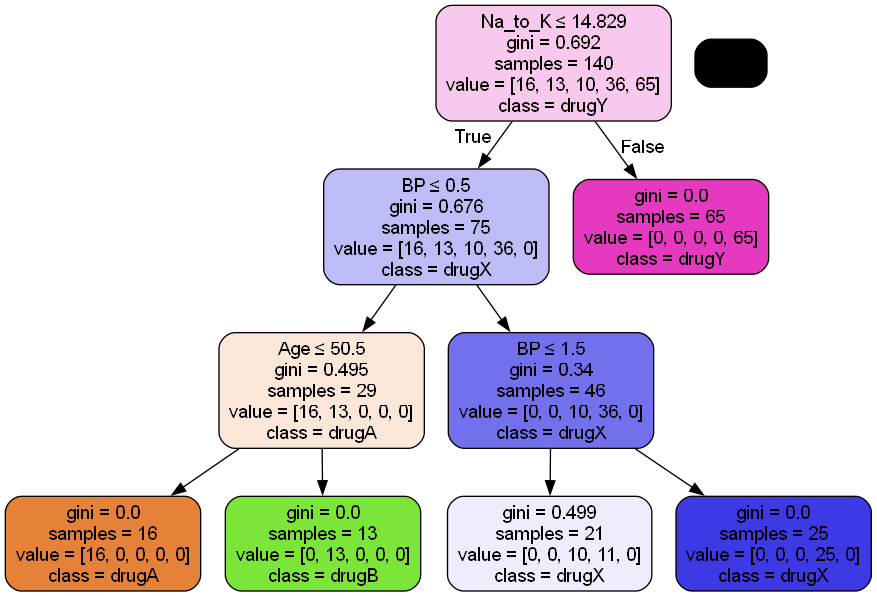

In [31]:
# Entrenar el mejor modelo gini profundidar de 3
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = clf.predict(X_test)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Visualización del árbol de decisiones
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=label_encoders['Drug'].classes_,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



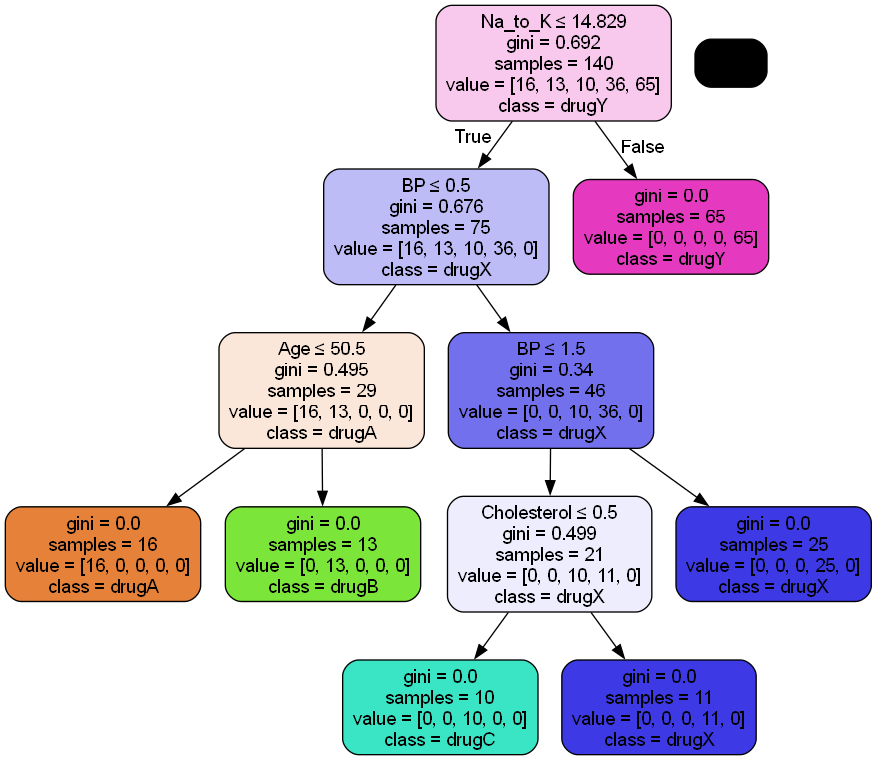

In [35]:
# Entrenar el mejor modelo gini profundidar de 4
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = clf.predict(X_test)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Visualización del árbol de decisiones
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=label_encoders['Drug'].classes_,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

C:\Users\lalo1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lalo1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lalo1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         6
           3       0.75      1.00      0.86        18
           4       1.00      1.00      1.00        26

    accuracy                           0.85        60
   macro avg       0.49      0.60      0.54        60
weighted avg       0.74      0.85      0.79        60



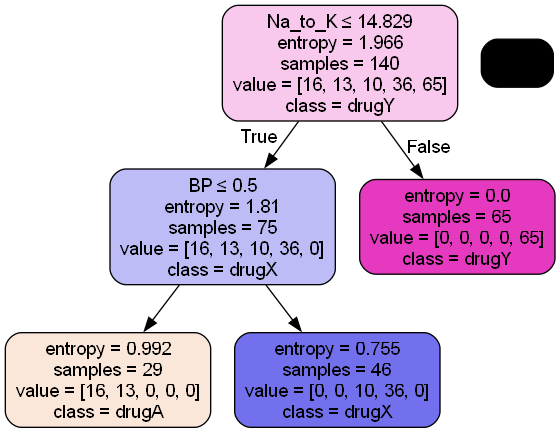

In [39]:
# Entrenar el mejor modelo entropy profundidar de 2
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = clf.predict(X_test)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Visualización del árbol de decisiones
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=label_encoders['Drug'].classes_,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

C:\Users\lalo1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lalo1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lalo1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         6
           3       0.75      1.00      0.86        18
           4       1.00      1.00      1.00        26

    accuracy                           0.90        60
   macro avg       0.75      0.80      0.77        60
weighted avg       0.82      0.90      0.86        60



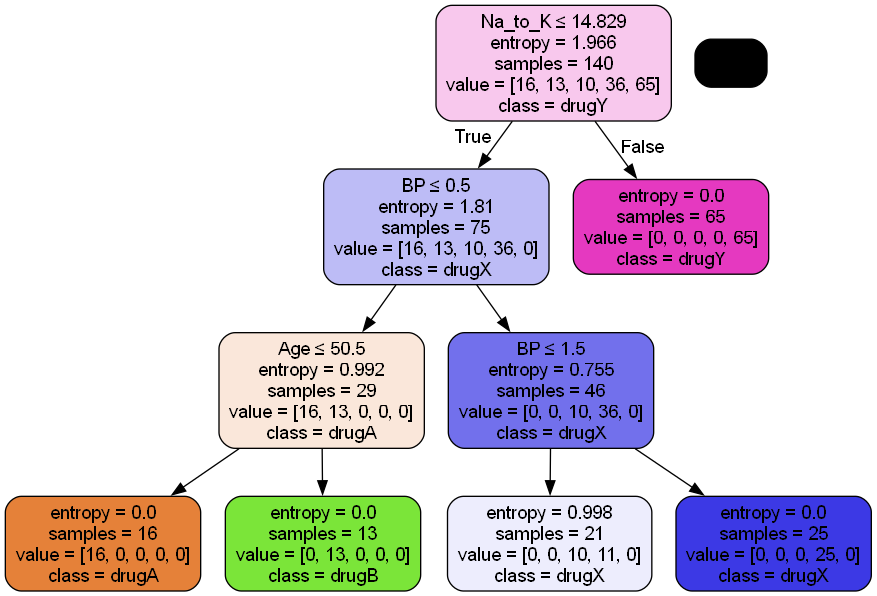

In [41]:
# Entrenar el mejor modelo entropy profundidar de 3
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = clf.predict(X_test)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Visualización del árbol de decisiones
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=label_encoders['Drug'].classes_,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

C:\Users\lalo1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lalo1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lalo1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         6
           3       0.75      1.00      0.86        18
           4       1.00      1.00      1.00        26

    accuracy                           0.90        60
   macro avg       0.75      0.80      0.77        60
weighted avg       0.82      0.90      0.86        60



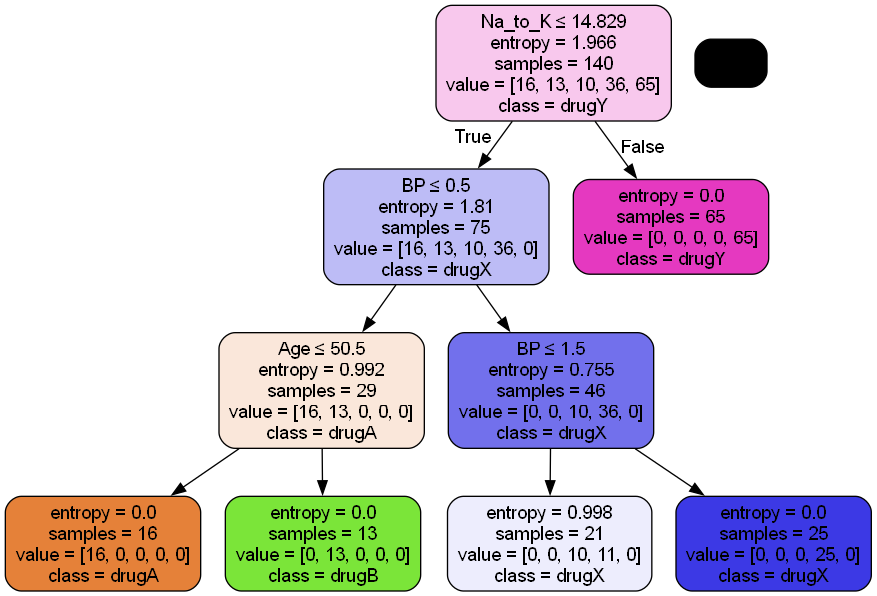

In [43]:
# Entrenar el mejor modelo entropy profundidar de 3
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = clf.predict(X_test)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Visualización del árbol de decisiones
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=label_encoders['Drug'].classes_,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



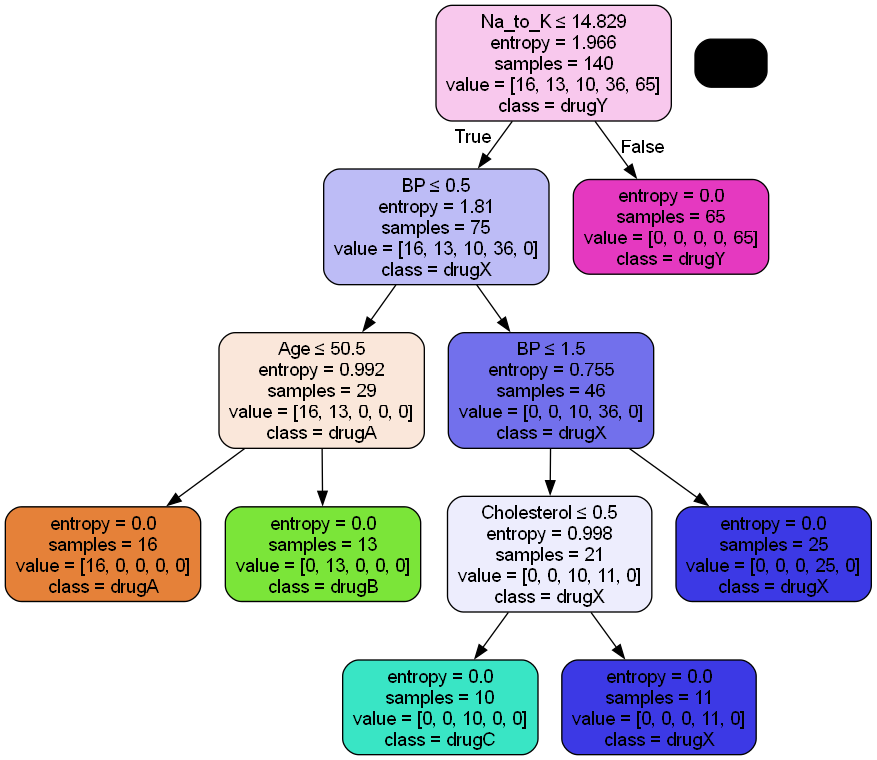

In [45]:
# Entrenar el mejor modelo entropy profundidar de 4
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = clf.predict(X_test)
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Visualización del árbol de decisiones
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=label_encoders['Drug'].classes_,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Las dos versiones por dos datos que estamos usando, tienen el mismo resultado en las mismas profundidades, y en ambas Gini y Entropia, al estar en una profundidad de 4 tenemos el mejor resultado de cada una, Por lo cual en esa profundidad y cual sea el selecionado nos dara el mejor resultado, ahora bien al tener una menor profundidad los precision de los modelos se ve afectada y es por como lee e intrerpreta la informacion, como se esta dando una entrada de 5 valores que pueden encasillarse, seria un resultado extraño.

# Para el caso de age = 50, Sex = F, BP = HIGH, Cholesterol = Normal, Na_to_k = 15.302, el farmaco que corresponderia seria Y, porque si se ve el inicio del arbol de decisiones, la comparacion es con  Na_to_k, es mayor al que nos muestra al inicio, por lo tanto cae en ese farmaco